FIFA Winner Prediction

Project by: 
*   Harish Agarwal(200031101611025)




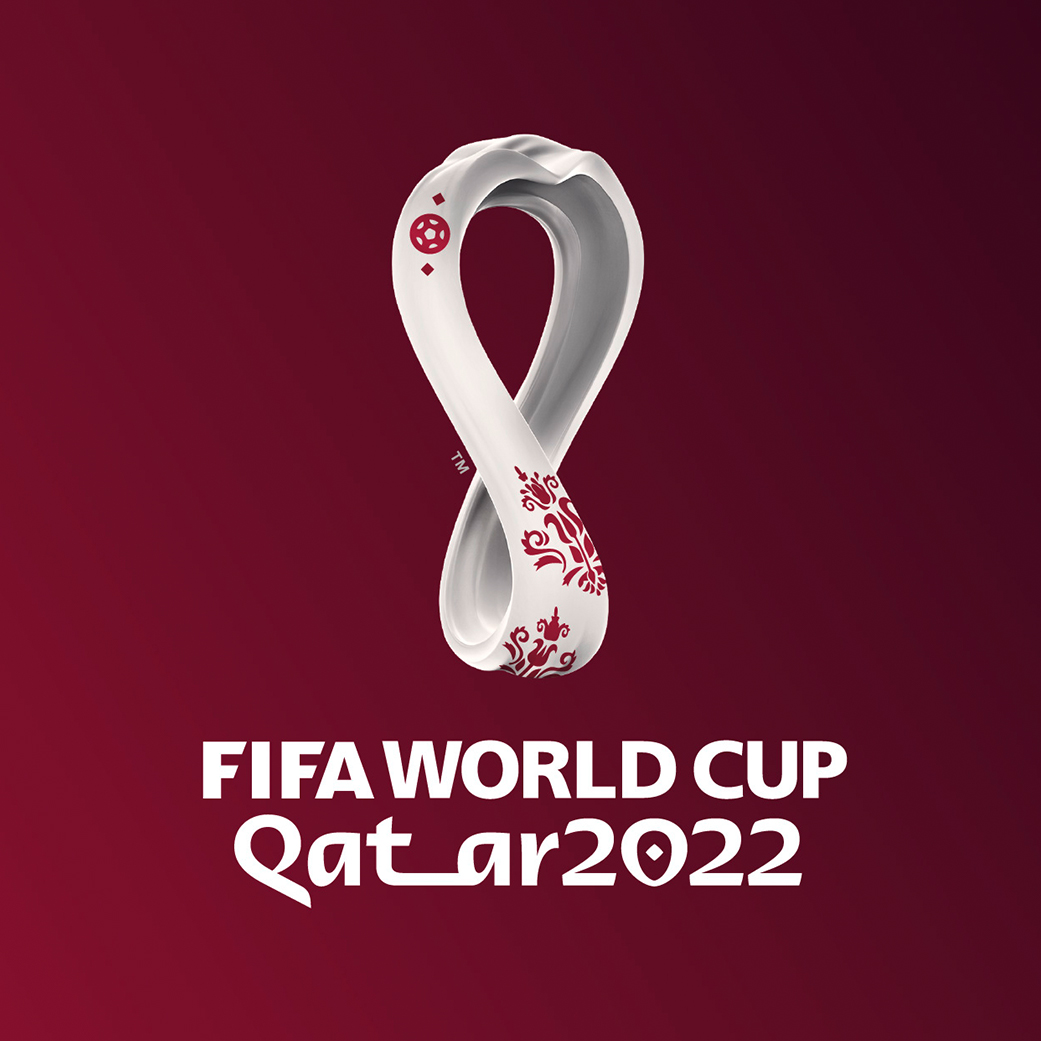

In [22]:
Image(filename='fifa.jpg')

Context: 

The FIFA World Cup is an international soccer tournament held every four years. The 2022 FIFA World Cup is scheduled to take place in Qatar from November 21 to December 18, 2022. This will be the first time that the World Cup will be held in the Middle East, and the first time that it will take place in November and December, rather than June and July. A total of 32 teams will participate in the tournament. 

Objective:

The main objective is to predict the winner of 2022 FIFA world cup with the help of data of all the previous matches played till now.

Data Description

The data contains the different data related to a previous FIFA world cup. The detailed data dictionary is given below.

Data Dictionary:

date:The actual date when the match was played.

home_team:home team is the team which playes in its own country.

away_team:away team is the team which playes matches in any country except its country.

home_score:Score made by home team.

away_score:score made by away team

tournament:There are different types of tournament like FIFA, friendly, British tournament etc.

city:The city in which the match was played.

country: Country in which the match was played.

neutral: Result of the match.



Let us start by importing the required libraries

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from IPython.display import Image
random_num=122

Understanding the structure of the data

In [3]:
#Reading the dataset

df=pd.read_csv("results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the matche played by the teams.

Question 1: How many rows and columns are present in the data?

In [4]:
print('the data frame has',df.shape[0],'rows and',df.shape[1],'columns')

the data frame has 44341 rows and 9 columns


Observations: 

We have 42082 rows and 9 columns in the data. The rows account for all the orders processed

Question 2: What are the datatypes of the different columns in the dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44341 entries, 0 to 44340
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44341 non-null  object
 1   home_team   44341 non-null  object
 2   away_team   44341 non-null  object
 3   home_score  44341 non-null  int64 
 4   away_score  44341 non-null  int64 
 5   tournament  44341 non-null  object
 6   city        44341 non-null  object
 7   country     44341 non-null  object
 8   neutral     44341 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


Observations: 

We have 1 bool data type, 2 integers and 6 objects.

Question 3: Check the statistical summary of the data. What is the minimum, average, and maximum score of home and away team?

In [6]:
df.describe()

,home_score,away_score
count,44341.000000,44341.000000
mean,1.740376,1.178886
std,1.748736,1.394663
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Observations:



*   we have total 42082 observations. 
*   mean, std, min and max score of home team is 1.743691, 1.752459, 0.000000 and 31.00000 respectively.


*   mean, std, min and max score of away team is 1.186541, 1.403957, 0.000000 and 21.00000 respectively.





Question 4: Are there any missing values in the data? If yes, treat them using an appropriate method?

In [7]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Observations:

We do not have any null values in the data frame, hence it requires no treatment

Question 5: Find out all the outliers in the data columns?

([<matplotlib.axis.XTick at 0x7fd9a6f66e50>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

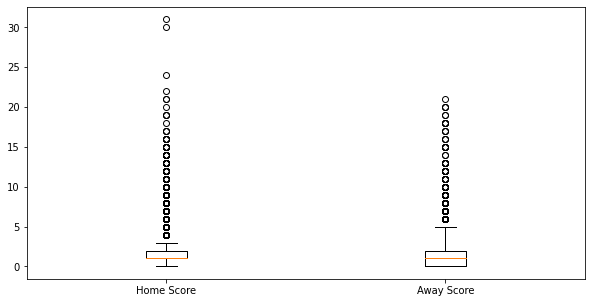

In [8]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

Observations:


*   We have created a box plot to find out the outliers
*   Boxplot says there are many outliers. Let's remove those outliers.
*   It will make our machine learning model more accurate.





Question 6: Remove all the outliers?

In [9]:
higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Observations:


*   To remove all the outliers we assume that the maximum goals that one team can score is 15 
*   datasets after removing outliers



Question 7: Make a new column to represent the result of all the matches?

In [10]:
conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head(5)

<ipython-input-10-d429f1ca9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Win_Statues"] = np.select(conditions, choices)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


Observations:


*   Making a new column named "Win_Statues"
*   "Win_Statues" will store the result(Win, Lost, Draw)
 of the home team


Question 8: List down all the countries present in the dataset?

In [11]:
countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 309 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghan

Observations:


*   all the countries present in the dataset are listed above



Question 9: Visually represent all the types of tournament ever played?

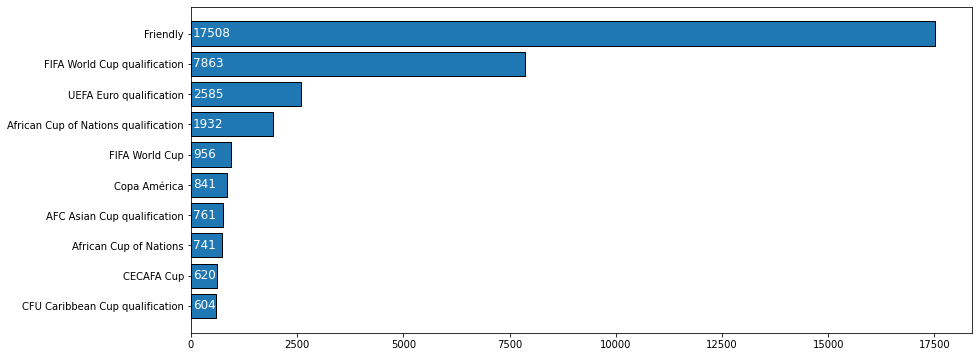

In [12]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

Observations:

There are total 10 types of tournament ever played and they are represented virtually above.  

Question 10: Which country has played most of the matches and which country has played minimum matches?

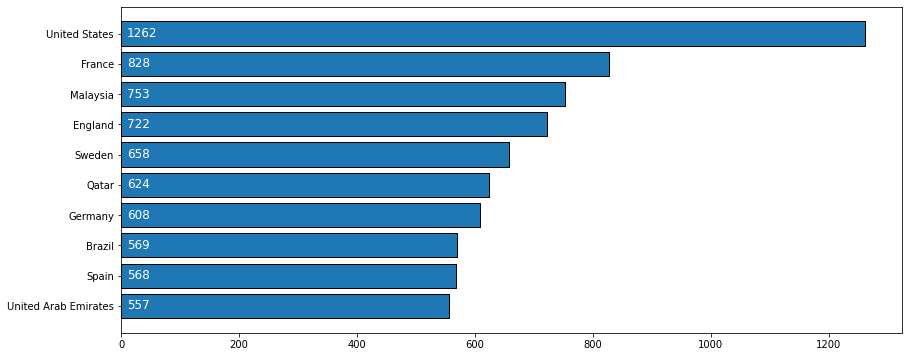

In [13]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

Observations:

*   To find out the the which country has played maximum and minimum matches, we have plot a bar plot. 
*   From the above bar plot, it is clear that United States has played most of the matches and Austria has played minimum matches.



Question 11: Which year in the history can be called as the start of golden era of football history? 

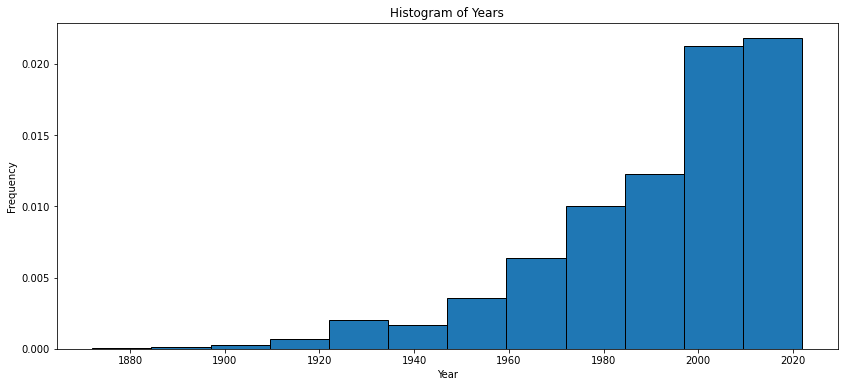

In [14]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

Observations:


*   Most matches are played after 1960.
*   Hence we can say that 1960 is the start of golden era of football history.



Question 12: Write a code to remove all the friendly tournament matches.

In [15]:
data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0,5,British Home Championship,Belfast,Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6,0,British Home Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1,8,British Home Championship,Belfast,Ireland,False,Lost
32,1884-03-15,Scotland,England,1,0,British Home Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0,4,British Home Championship,Wrexham,Wales,False,Lost


Observations:


*   In order to predict the winner we have to remove friendly tournament matches.
*   we will take home_team == Country and remove the data of friendly matches.



Question 13: Describe the performance of the home team in tournament matches.

In [16]:
tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5818,7649,13315,26782
FIFA World Cup qualification,1652,2180,4031,7863
UEFA Euro qualification,508,816,1261,2585
African Cup of Nations qualification,472,379,1081,1932
FIFA World Cup,211,310,435,956
Copa América,181,230,430,841
AFC Asian Cup qualification,126,188,447,761
African Cup of Nations,209,200,332,741
CECAFA Cup,147,185,288,620


Observation:

above table shows the data of draw, lost, win matches of home team in all the tournaments.  

Text(0.5, 1.0, 'Home Team Winning Status')

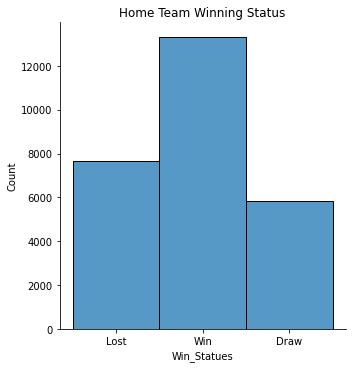

In [17]:
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

Observation:

Displot shows the result of home team visually but we want accurate data so that we can get more accuracy.

In [18]:
data_home['Win_Statues'].value_counts()

Win     13315
Lost     7649
Draw     5818
Name: Win_Statues, dtype: int64

Observations:


*   Total matches won by the home team is 12350.
*   Total matches Lost by the home team is 7111.
*   Total matches draw by the home team is 5388.
*   This is the overall performance of the home team.





Question 14: How each team perform while playing a tournament in home grounds?

In [19]:
teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability") 

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,110,58,426,594,0.717172
Spain,71,51,257,379,0.678100
Argentina,124,69,375,568,0.660211
Egypt,70,74,260,404,0.643564
Ivory Coast,67,36,183,286,0.639860
Nigeria,69,36,185,290,0.637931
Iran,63,45,185,293,0.631399
Italy,123,52,291,466,0.624464
England,115,83,326,524,0.622137


Observations:


*   Lets take teams which plays atleast 200 games
*   We can see teams has more than 50% wining probability while playing in the home grounds



Question 15:How each team perform while playing a tournament in away grounds?

In [20]:
teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Germany,94,247,119,460,0.536957
Brazil,95,228,103,426,0.535211
England,136,271,117,524,0.517176
Spain,101,169,84,354,0.477401
Iran,67,105,58,230,0.456522
South Korea,115,181,110,406,0.445813
Netherlands,83,169,129,381,0.443570
Russia,118,176,113,407,0.432432
Japan,57,117,103,277,0.422383


Observations:


*   Lets take teams which plays atleast 200 games
*   The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions



Question 16: Convert the data set into 10 terms and findsout who has done best at each term? 
Note: Take home conditions

In [21]:
range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    best_teams["team_win_probability"]=best_teams["Win"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    if (best_teams.shape[0]>2):
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

No Enough data to find the best team in the term: 1872-1887 

Best 2 team in the term: 1887-1902 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      2 |      3 |    20 |      25 |               0.8      |
| Scotland    |      2 |      3 |    18 |      23 |               0.782609 |

Best 2 team in the term: 1902-1917 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Hungary     |      7 |      5 |    19 |      31 |               0.612903 |
| Argentina   |      6 |      6 |    18 |      30 |               0.6      |

Best 2 team in the term: 1917-1932 
| home_team      |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:---------------|-------:|-------:|------:|--------:|-----------------------:|
| Czechoslovakia |      8 |      1 |    21 |      30

ValueError: ignored

Observations:


*   We will take teams which plays atleast 20 games.
*   Best 2 team in the term 1886-1900 is England and scotland.
*   Best 2 team in the term 1886-1914 is England and Hungary.
*   Best 2 team in the term 1914-1928 is Denmark and Argentina.
*   Best 2 team in the term 1928-1948 is Argentina and England.
*   Best 2 team in the term 1948-1956 is Costa Rica and Hungary.
*   Best 2 team in the term 1956-1970 is China PR and Ghana.
*   Best 2 team in the term 1970-1984 is Russia and Brazil.
*   Best 2 team in the term 1984-1998 is Czech Republic and Nigeria.
*   Best 2 team in the term 1998-2012 is Spain and Jersey.
*   Best 2 team in the term 2012-2021 is Egypt and Spain.

Question 17: Convert the data set into 10 terms and findsout who has done best at each term? 
Note: Take away conditions

In [23]:
range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
    if (best_teams.shape[0]>2):
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")


Best 2 team in the term: 1872-1887 
No Enough data to find the best team in the term: 1872-1887 

Best 2 team in the term: 1887-1902 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland    |      6 |     13 |     4 |      23 |               0.565217 |
| Total       |     13 |     30 |    47 |      90 |               0.333333 |

Best 2 team in the term: 1902-1917 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      5 |     18 |     4 |      27 |               0.666667 |
| Argentina   |      3 |      9 |     9 |      21 |               0.428571 |

Best 2 team in the term: 1917-1932 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland    |      

ValueError: ignored

Observations:


*   We will take teams which plays atleast 20 games.
*   Best 2 team in the term 1886-1900 is scotland.
*   Best 2 team in the term 1886-1914 is England.
*   Best 2 team in the term 1914-1928 is England and Urguay.
*   Best 2 team in the term 1928-1942 is Germany and Scotland.
*   Best 2 team in the term 1942-1956 is Yugoslavia and Hungary.
*   Best 2 team in the term 1956-1970 is Zambia and Brazil.
*   Best 2 team in the term 1970-1984 is Tahiti and Germany.
*   Best 2 team in the term 1984-1998 is Brazil and Germany.
*   Best 2 team in the term 1998-2012 is Spain and France.
*   Best 2 team in the term 2012-2021 is Brazil and Belgium.

In [24]:
df_match=df.copy() 
df_match.head(8)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Lost


Observation:

We have created a copy of main dataframe for future use.

In [25]:
#Making a new dataset with required features to train the machine learning model
#Year,Played Country,Team_1,team_2,team_1 score,team_2 score

New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
#Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,1922,Latvia,Estonia,Latvia,1,1
1,1988,Iceland,Iceland,Bulgaria,2,3
2,1983,Northern Ireland,Northern Ireland,England,0,0
3,1997,Belgium,Republic of Ireland,Belgium,1,2
4,2003,Ethiopia,Ethiopia,Liberia,1,0


In [26]:
#Creating a list containg all the names of the countries

teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

350

,year,team_1_score,team_2_score
year,1.000000,-0.125411,-0.125411
team_1_score,-0.125411,1.000000,-0.162372
team_2_score,-0.125411,-0.162372,1.000000


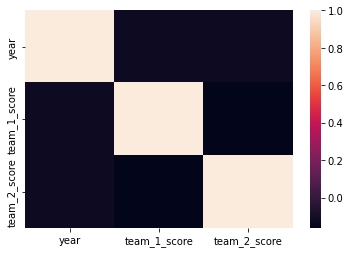

In [27]:
#Making a heatmap to see the correlation of each columns 

sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [29]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")


In [30]:
#Input Fatures to the model (x)

categorized_data.head(5)

,year,Country,team_1,team_2
0,1922,163,96,163
1,1988,47,136,47
2,1983,93,218,93
3,1997,29,244,29
4,2003,167,98,167


In [31]:
#Targets to the model (Y)

Y.head(5)

,team_1_score,team_2_score
0,1,1
1,2,3
2,0,0
3,1,2
4,1,0


In [32]:
#Info about the X and Y dataframes

print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88580 entries, 0 to 88579
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     88580 non-null  int64   
 1   Country  88580 non-null  category
 2   team_1   88580 non-null  category
 3   team_2   88580 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88580 entries, 0 to 88579
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  88580 non-null  int64
 1   team_2_score  88580 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None


In [33]:
#Making the model

X=categorized_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = MultiOutputRegressor(RandomForestClassifier())
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier())

In [34]:
#Making the predictions

prd=model.predict(X)
prd

array([[1, 1],
       [2, 3],
       [0, 0],
       ...,
       [1, 7],
       [1, 0],
       [3, 0]])

In [35]:
#Creating the Confusion matrix for each predictions

score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(159.0, 0.5, 'Predicted')

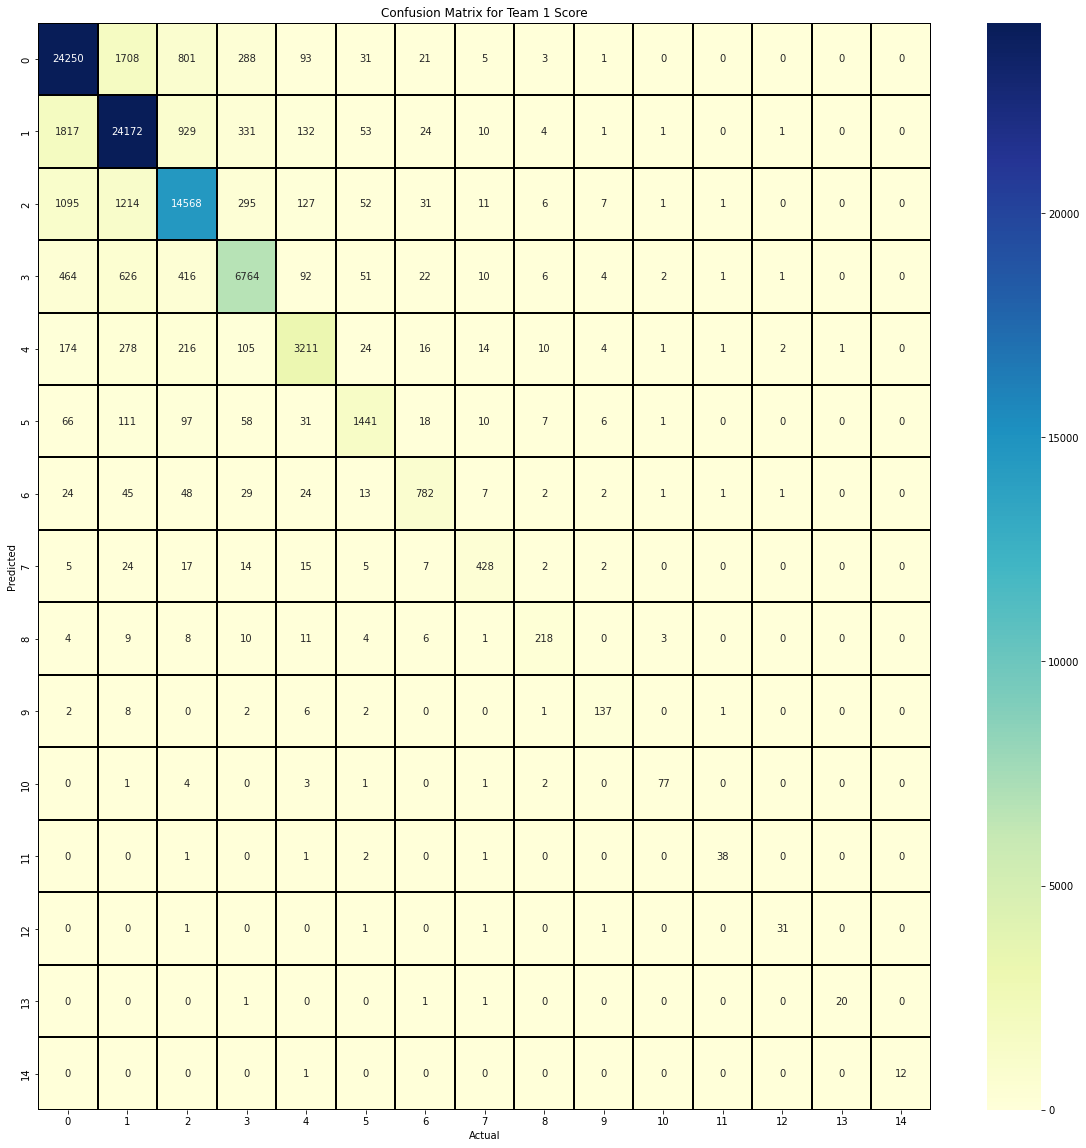

In [36]:
#Plotting the Confussion Matrix for score of team 01

plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [37]:
#Classification Report to team 1 Score

from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

#Has a good Accuracy in predicting the team 1 Score

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27201
           1       0.86      0.88      0.87     27475
           2       0.85      0.84      0.84     17408
           3       0.86      0.80      0.83      8459
           4       0.86      0.79      0.82      4057
           5       0.86      0.78      0.82      1846
           6       0.84      0.80      0.82       979
           7       0.86      0.82      0.84       519
           8       0.84      0.80      0.81       274
           9       0.83      0.86      0.85       159
          10       0.89      0.87      0.88        89
          11       0.88      0.88      0.88        43
          12       0.86      0.89      0.87        35
          13       0.95      0.87      0.91        23
          14       1.00      0.92      0.96        13

    accuracy                           0.86     88580
   macro avg       0.87      0.85      0.86     88580
weighted avg       0.86   

Text(159.0, 0.5, 'Predicted')

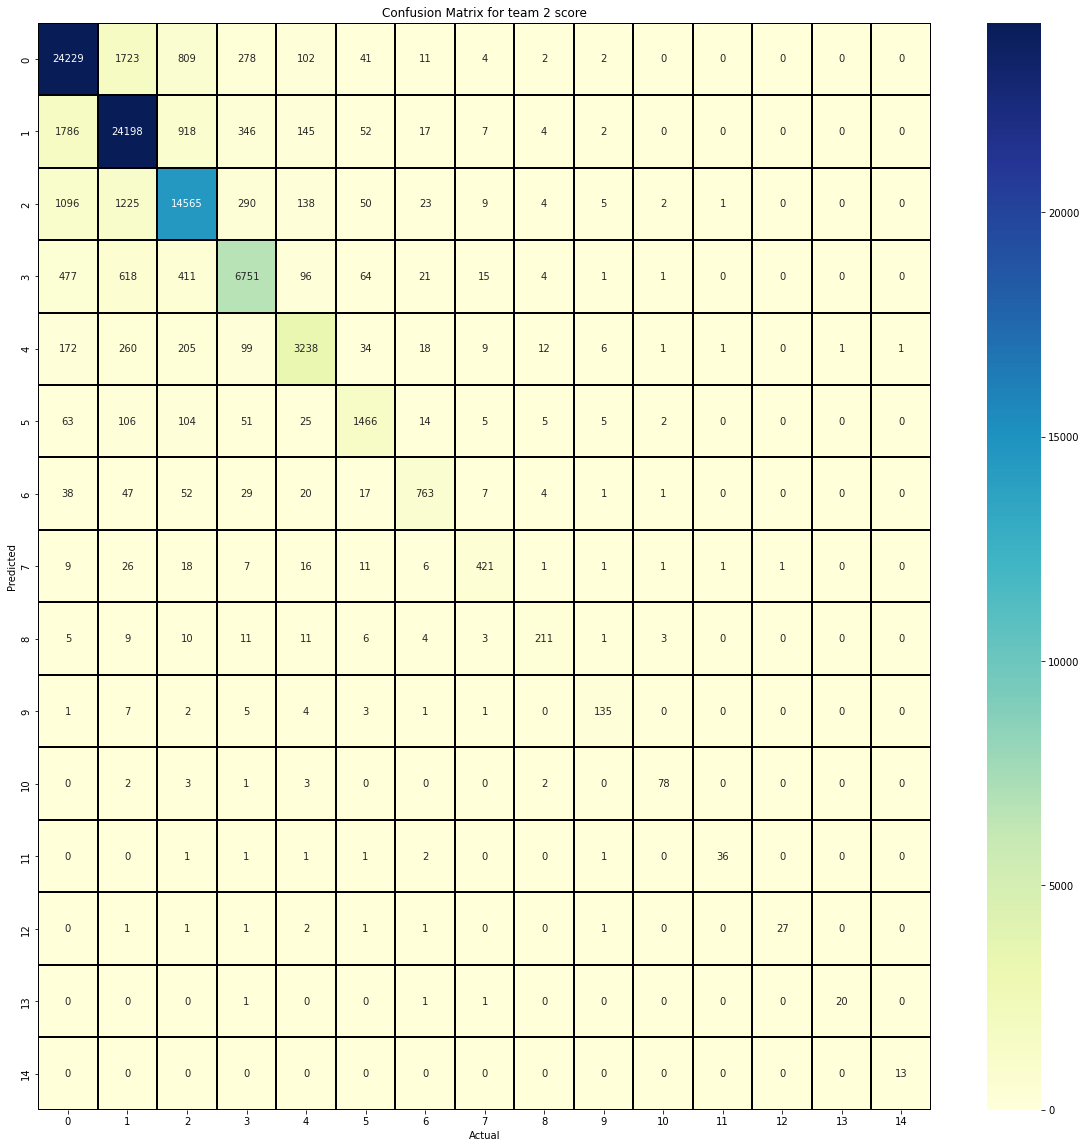

In [38]:
#Plotting the Confussion Matrix for score of team 02

plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [39]:
#Classification Report to team 2 Score

report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

#Has a good Accuracy in predicting the team 1 Score#

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27201
           1       0.86      0.88      0.87     27475
           2       0.85      0.84      0.84     17408
           3       0.86      0.80      0.83      8459
           4       0.85      0.80      0.82      4057
           5       0.84      0.79      0.82      1846
           6       0.87      0.78      0.82       979
           7       0.87      0.81      0.84       519
           8       0.85      0.77      0.81       274
           9       0.84      0.85      0.84       159
          10       0.88      0.88      0.88        89
          11       0.92      0.84      0.88        43
          12       0.96      0.77      0.86        35
          13       0.95      0.87      0.91        23
          14       0.93      1.00      0.96        13

    accuracy                           0.86     88580
   macro avg       0.88      0.84      0.86     88580
weighted avg       0.86   

In [40]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [41]:
#Sample Prediction

mactch_played=2015
team_1="Sri Lanka"
team_2="Brazil"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is Sri Lanka -286
Team 02 is Brazil -41
Played in  Qatar -242


In [42]:
#Sample Prediction Output

X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

Sri Lanka vs Brazil 
  Match Draw ⚽⚽⚽



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
Group_A= ["Uruguay","Russia","Saudi Arabia","Egypt"]
Group_B= ["Portugal","Spain","Morocco","Iran"]
Group_C= ["France","Denmark","Australia","Peru"]
Group_D= ["Argentina","Croatia","Iceland","Nigeria"]
Group_E= ["Brazil","Switzerland","Costa Rica","Serbia"]
Group_F= ["South Korea","Mexico","Sweden","Germany"]
Group_G= ["Belgium","England","Panama","Tunisia"]
Group_H= ["Senegal","Japan","Poland","Colombia"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [44]:
#Initialize basic parameters

year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [45]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
Uruguay vs Russia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Uruguay vs Saudi Arabia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Uruguay vs Egypt 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Russia vs Saudi Arabia 
  Results of the Match [1 0]
   Russia wins 🎊🏆⚽🎖️

Russia vs Egypt 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Saudi Arabia vs Egypt 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Group B Matches


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

 Portugal vs Spain 
  Results of the Match [1 0]
   Portugal wins 🎊🏆⚽🎖️

Portugal vs Morocco 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Portugal vs Iran 
  Results of the Match [1 0]
   Portugal wins 🎊🏆⚽🎖️

Spain vs Morocco 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Spain vs Iran 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Morocco vs Iran 
  Results of the Match [1 0]
   Morocco wins 🎊🏆⚽🎖️

Group C Matches
 France vs Denmark 
  Results of the Match [0 1]
   Denmark wins 🎊🏆⚽🎖️

 France vs Australia 
  Results of the Match [0 1]
   Australia wins 🎊🏆⚽🎖️



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

 France vs Peru 
  Results of the Match [2 1]
   France wins 🎊🏆⚽🎖️

 Denmark vs Australia 
  Results of the Match [2 1]
   Denmark wins 🎊🏆⚽🎖️

 Denmark vs Peru 
  Results of the Match [0 1]
   Peru wins 🎊🏆⚽🎖️

Australia vs Peru 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Group D Matches
 Argentina vs Croatia 
  Results of the Match [1 0]
   Argentina wins 🎊🏆⚽🎖️

 Argentina vs Iceland 
  Results of the Match [2 0]
   Argentina wins 🎊🏆⚽🎖️

 Argentina vs Nigeria 
  Results of the Match [2 0]
   Argentina wins 🎊🏆⚽🎖️

Croatia vs Iceland 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Croatia vs Nigeria 
  Results of the Match [2 0]
   Croatia wins 🎊🏆⚽🎖️



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

 Iceland vs Nigeria 
  Results of the Match [0 1]
   Nigeria wins 🎊🏆⚽🎖️

Group E Matches
 Brazil vs Switzerland 
  Results of the Match [1 0]
   Brazil wins 🎊🏆⚽🎖️

 Brazil vs Costa Rica 
  Results of the Match [1 0]
   Brazil wins 🎊🏆⚽🎖️

 Brazil vs Serbia 
  Results of the Match [2 0]
   Brazil wins 🎊🏆⚽🎖️

Switzerland vs Costa Rica 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Switzerland vs Serbia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Costa Rica vs Serbia 
  Results of the Match [1 0]
   Costa Rica wins 🎊🏆⚽🎖️

Group F Matches
 South Korea vs Mexico 
  Results of the Match [2 0]
   South Korea wins 🎊🏆⚽🎖️

South Korea vs Sweden 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 South Korea vs Germany 
  Results of the Match [2 0]
   South Korea wins 🎊🏆⚽🎖️



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

 Mexico vs Sweden 
  Results of the Match [1 0]
   Mexico wins 🎊🏆⚽🎖️

 Mexico vs Germany 
  Results of the Match [1 0]
   Mexico wins 🎊🏆⚽🎖️

 Sweden vs Germany 
  Results of the Match [0 2]
   Germany wins 🎊🏆⚽🎖️

Group G Matches
 Belgium vs England 
  Results of the Match [1 0]
   Belgium wins 🎊🏆⚽🎖️

 Belgium vs Panama 
  Results of the Match [1 0]
   Belgium wins 🎊🏆⚽🎖️

 Belgium vs Tunisia 
  Results of the Match [1 0]
   Belgium wins 🎊🏆⚽🎖️

England vs Panama 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

England vs Tunisia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Panama vs Tunisia 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Group H Matches
 Senegal vs Japan 
  Results of the Match [1 2]
   Japan wins 🎊🏆⚽🎖️

 Senegal vs Poland 
  Results of the Match [3 1]
   Senegal wins 🎊🏆⚽🎖️

Senegal vs Colombia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Japan vs Poland 
  Results of the Match [0 3]
   Poland wins 🎊🏆⚽🎖️

Japan vs Colombia 
  Results of the Match [0 0]
   Match

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

In [46]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())
    



Group A Final Rankings
|    | Team         |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:-------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Russia       |      1 |      2 |      0 |             1 |              0 |                 1 |        4 |
|  2 | Egypt        |      0 |      3 |      0 |             0 |              0 |                 0 |        3 |
|  3 | Uruguay      |      0 |      3 |      0 |             0 |              0 |                 0 |        3 |
|  4 | Saudi Arabia |      0 |      2 |      1 |             0 |              1 |                -1 |        2 |


Group B Final Rankings
|    | Team     |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:---------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Portugal |      2 |      1 |      0 |          

In [47]:
##Round of 16 Section_1

qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Russia vs Morocco 
  Match Draw ⚽⚽
   Morocco wins at Penaly Shoot-Out 🥅🎯
    Morocco into the Quater-Finals ⏩⏩ 

Denmark vs Croatia 
  Match Draw ⚽⚽
   Croatia wins at Penaly Shoot-Out 🥅🎯
    Croatia into the Quater-Finals ⏩⏩ 

Brazil vs Mexico 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Belgium vs Senegal 
  Belgium wins 🏆🏆
    Belgium into the Quater-Finals ⏩⏩ 

Uruguay vs Portugal 
  Portugal wins 🏆🏆
    Portugal into the Quater-Finals ⏩⏩ 

Australia vs Argentina 
  Australia wins 🏆🏆
    Australia into the Quater-Finals ⏩⏩ 

Costa Rica vs South Korea 
  Costa Rica wins 🏆🏆
    Costa Rica into the Quater-Finals ⏩⏩ 

England vs Japan 
  Japan wins 🏆🏆
    Japan into the Quater-Finals ⏩⏩ 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

In [48]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Morocco', 'Croatia', 'Brazil', 'Belgium', 'Portugal', 'Australia', 'Costa Rica', 'Japan']


In [49]:
#Quarter Finals

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Morocco vs Croatia 
  Match Draw ⚽⚽
   Morocco wins at Penaly Shoot-Out 🥅🎯
    Morocco into the Semi-Finals ⏩⏩ 

Brazil vs Belgium 
  Brazil wins 🏆🏆
    Brazil into the Semi-Finals ⏩⏩ 

Portugal vs Australia 
  Match Draw ⚽⚽
   Portugal wins at Penaly Shoot-Out 🥅🎯
    Portugal into the Semi-Finals ⏩⏩ 

Costa Rica vs Japan 
  Costa Rica wins 🏆🏆
    Costa Rica into the Semi-Finals ⏩⏩ 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

In [50]:

print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Morocco', 'Brazil', 'Portugal', 'Costa Rica']


In [51]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2
    

Semi Final Matches

Morocco vs Brazil 
  Match Draw ⚽⚽
   Brazil wins at Penaly Shoot-Out 🥅🎯
    Brazil into the FIFA-Finals ⏩⏩ 

Portugal vs Costa Rica 
  Match Draw ⚽⚽
   Portugal wins at Penaly Shoot-Out 🥅🎯
    Portugal into the FIFA-Finals ⏩⏩ 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:

print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Brazil', 'Portugal']
Teams selected to the Third Place match - ['Morocco', 'Costa Rica']


In [53]:

#Finals and Third Place match

print(f"FiIFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiIFA FINAl

Portugal vs Brazil 
  Match Draw ⚽⚽
   Portugal wins at Penaly Shoot-Out 🥅🎯
    Portugal are the Winners 🎉🏆🎉


Third Place match

Costa Rica vs Morocco 
  Match Draw ⚽⚽
   Morocco wins at Penaly Shoot-Out 🥅🎯
    Morocco Wins the 3rd Place 🎉🏆🎉



Winner is Portugal 🥇🥇🥇
Runner-up is Brazil 🥈🥈🥈
3rd Place is Morocco 🥉🥉🥉


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


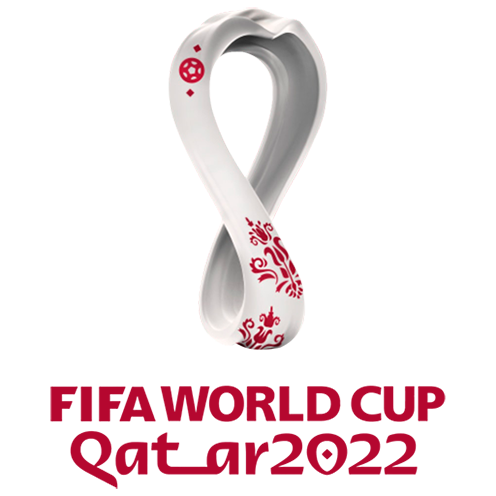

In [54]:
Image(filename='fi.png')